In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
train=pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
traveller_ID        393 non-null int64
ticket_class        393 non-null float64
name                393 non-null object
sex                 393 non-null object
age                 317 non-null float64
Siblings_spouses    393 non-null float64
Parchil             393 non-null float64
TickNum             393 non-null object
fare                393 non-null float64
cabin               91 non-null object
embarked            392 non-null object
MedBoat             159 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 36.9+ KB


In [25]:
train.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0


In [26]:
train.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [27]:
test.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare
count,393.000000,393.000000,317.000000,393.000000,393.000000,393.000000
mean,648.758270,2.269720,31.672187,0.404580,0.381679,32.332188
std,370.986997,0.829017,15.472486,0.934967,0.796594,49.199401
min,10.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,327.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,618.000000,3.000000,30.000000,0.000000,0.000000,13.000000
75%,986.000000,3.000000,40.500000,1.000000,0.000000,31.275000
max,1301.000000,3.000000,74.000000,8.000000,6.000000,512.329200


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.1+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
traveller_ID        393 non-null int64
ticket_class        393 non-null float64
name                393 non-null object
sex                 393 non-null object
age                 317 non-null float64
Siblings_spouses    393 non-null float64
Parchil             393 non-null float64
TickNum             393 non-null object
fare                393 non-null float64
cabin               91 non-null object
embarked            392 non-null object
MedBoat             159 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 36.9+ KB


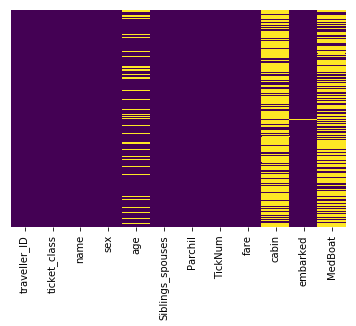

In [30]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
##data cleaning

In [31]:
train.drop(['traveller_ID','name','cabin','MedBoat'],axis=1,inplace=True)
test.drop(['traveller_ID','name','cabin','MedBoat'],axis=1,inplace=True)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
ticket_class        916 non-null int64
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
embarked            915 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [33]:
train.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived
0,3,male,NaN,0,0,315037,8.6625,S,0
1,3,male,26.0,0,0,349224,7.8958,S,0
2,2,female,19.0,0,0,250655,26.0000,S,1
3,3,female,NaN,8,2,CA. 2343,69.5500,S,0
4,3,female,28.0,0,0,347086,7.7750,S,0


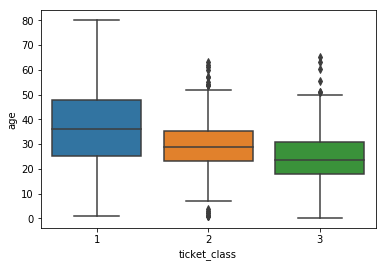

In [34]:
sns.boxplot(x='ticket_class',y='age',data=train)

In [35]:
# filling in missing values for age

def impute_age(cols):
    Age=cols[0]
    ticket_class=cols[1]
    
    if pd.isnull(Age):
        if ticket_class ==1:
               return 36
        elif ticket_class ==2:
               return 28
        else:
            return 25       
    else:
        return Age

In [36]:
train['age'] = train[['age','ticket_class']].apply(impute_age,axis=1)
test['age'] = train[['age','ticket_class']].apply(impute_age,axis=1)

In [37]:
train['fare'].fillna(train['fare'].mean(), inplace=True, axis=0)
test['fare'].fillna(test['fare'].mean(), inplace=True, axis=0)

In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 8 columns):
ticket_class        393 non-null float64
sex                 393 non-null object
age                 393 non-null float64
Siblings_spouses    393 non-null float64
Parchil             393 non-null float64
TickNum             393 non-null object
fare                393 non-null float64
embarked            392 non-null object
dtypes: float64(5), object(3)
memory usage: 24.6+ KB


In [39]:
test['embarked'].fillna('S', inplace=True, axis=0)

In [40]:
train.dropna(inplace=True, axis=0)
# test.dropna(inplace=True)

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915 entries, 0 to 915
Data columns (total 9 columns):
ticket_class        915 non-null int64
sex                 915 non-null object
age                 915 non-null float64
Siblings_spouses    915 non-null int64
Parchil             915 non-null int64
TickNum             915 non-null object
fare                915 non-null float64
embarked            915 non-null object
Survived            915 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 71.5+ KB


In [41]:
train.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,Survived
0,3,male,25.0,0,0,315037,8.6625,S,0
1,3,male,26.0,0,0,349224,7.8958,S,0
2,2,female,19.0,0,0,250655,26.0000,S,1
3,3,female,25.0,8,2,CA. 2343,69.5500,S,0
4,3,female,28.0,0,0,347086,7.7750,S,0


In [43]:
train.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
TickNum             0
fare                0
embarked            0
Survived            0
dtype: int64

In [44]:
test.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
TickNum             0
fare                0
embarked            0
dtype: int64

In [46]:
Sex = pd.get_dummies(train['sex'],drop_first=True)
embark = pd.get_dummies(train['embarked'],drop_first=True)
sex_test = pd.get_dummies(test['sex'],drop_first=True)
embark_test = pd.get_dummies(test['embarked'],drop_first=True)
ticket_class = pd.get_dummies(train['ticket_class'],drop_first=True)
ticket_class_test = pd.get_dummies(test['ticket_class'],drop_first=True)

In [47]:
train.drop(['sex','embarked','ticket_class','TickNum'],axis=1,inplace=True)
test.drop(['sex','embarked','ticket_class','TickNum'],axis=1,inplace=True)

In [ ]:
train.head()

In [ ]:
test.head()

In [48]:
train = pd.concat([train,Sex,embark,ticket_class],axis=1)
test_new = pd.concat([test,sex_test,embark_test,ticket_class_test],axis=1)

In [ ]:
train.head()

In [49]:
test_new.head()

,age,Siblings_spouses,Parchil,fare,male,Q,S,2.0,3.0
0,25.0,0.0,0.0,7.1250,1,0,1,0,1
1,26.0,1.0,1.0,15.7417,1,0,0,0,1
2,19.0,0.0,0.0,7.8958,1,0,1,0,1
3,25.0,0.0,0.0,8.0500,1,0,1,0,1
4,28.0,0.0,0.0,7.7500,1,1,0,0,1


In [ ]:
train.info()

In [ ]:
test_new.info()

In [ ]:
## building the model

In [ ]:
##splitting into training and testing

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
!pip3 install xgboost

In [50]:
test_new.columns = ['age', 'Siblings_spouses', 'Parchil', 'fare', 'male', 'Q', 'S', 2,
       3]

In [78]:
import xgboost as xgb
from xgboost import XGBClassifier

# xgboost = XGBClassifier(n_estimators=2000, base_score=0.8)
# xgboost.fit(X_train, y_train)
# y_Pred = xgboost.predict(X_test)

xgboost = XGBClassifier()
xgboost.fit(train.drop('Survived',axis=1), train['Survived'])
y_Pred = xgboost.predict(test_new)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [54]:
from sklearn.metrics import classification_report

In [76]:
print(classification_report(y_test,y_Pred))

             precision    recall  f1-score   support

          0       0.87      0.84      0.86       181
          1       0.71      0.77      0.74        94

avg / total       0.82      0.81      0.82       275



In [79]:
output = pd.DataFrame(y_Pred, columns=['Survived'])

In [80]:
output.head()

,Survived
0,0
1,1
2,0
3,0
4,0


In [ ]:
sample_submission.head()

In [ ]:
test_new.columns = ['age', 'Siblings_spouses', 'Parchil', 'fare', 'male', 'Q', 'S', 2,
       3]

In [59]:
ts = pd.read_csv('test.csv')

In [81]:
# predictDF = pd.DataFrame(predicts, columns=['Survived']
submit = pd.concat([ts['traveller_ID'], output], axis=1)
submit.head()

# submit['Survived'] = [int(i) for i in submit['Survived']]
# submit.to_csv('My_first_submission.csv', index=False)

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0


In [63]:
submit.isnull().sum()

traveller_ID    0
Survived        0
dtype: int64

In [82]:
submit.to_csv('My_first_submission.csv', index=False)

In [83]:
output['Survived'].value_counts()

0    246
1    147
Name: Survived, dtype: int64